# <center> Visualizing Facebook's Stock Prices </center>

### Learning Targets

- Getting familiar with different data formats
- Learn how to load a csv file using Pandas
- Handling date and time in Pandas
- Basic forms of manipulating DataFrames
- Learning the main visualization libraries Matplotlib and Seaborn
- Understanding the anatomy of Matplotlib
- Plotting stock prices - with increasing complexity in coding

## 1. Loading the Data

### Data Formats

The *format* of an open dataset refers to the way in which the data is structured and made available for humans and machines. Choosing the right format helps ensure the data can by simply managed and reused. To maximise reuse of the data, it may be necessary for a publisher to use a number of formats and structures available across different platforms to suit users' needs.

A ***comma separated values (CSV)*** file is simply lines of data, with each data point separated from the next by a comma. CSV is perfect for tabular data and can be easily loaded into and saved from applications like Excel, making it accessible to users. Although CSV doesn’t maintain formatting and graphs like Excel formats, it is an open, machine-readable format. CSV represents the simplest format that still supports broad reuse of open data. Wherever possible, the CSV file format should be used for sharing open data. CSV is a simple to understand, highly reusable and machine-readable format.

Geospatial data is often more complex than simple tabular datasets. When publishing this type of data, formats like ***geoJSON*** (based upon JavaScript Object Notation - JSON) and ***KML*** (based upon Extensible Markup Language - XML) should be considered. These formats are specifically designed with usability in mind and can easily be imported and exported from specialist mapping tools like Open Street Map and CartoDB.

### Reading a CSV File

Pandas is an open-source Python library that provides high performance data analysis tools and easy to use data structures. Reading CSV files is very easy in Pandas and highly recommended if you have a lot of data to analyze!

Pandas is available for all Python installations, but it is a key part of the Anaconda distribution and works extremely well in Jupyter notebooks to share data, code, analysis results, visualizations, and narrative text.

Reading the CSV into a pandas DataFrame is quick and straightforward:

In [1]:
# import the pandas library
import pandas as pd

# pd.read_csv() reads the CSV file and stores the data in a DataFrame
df = pd.read_csv('HistoricalQuotes.csv')

# print the head of the DataFrame, which by default will show the first 5 lines
df.head()

,date,close,volume,open,high,low
0,2019/05/17,185.30,10485370.0,186.99,187.580,184.28
1,2019/05/16,186.99,12953110.0,186.27,188.575,185.05
2,2019/05/15,186.27,16746900.0,180.73,187.280,180.02
3,2019/05/14,180.73,17628140.0,181.54,183.490,178.10
4,2019/05/13,181.54,16833350.0,188.34,185.430,180.84


In [2]:
# print the first 3 lines
df.head(3)

,date,close,volume,open,high,low
0,2019/05/17,185.30,10485370.0,186.99,187.580,184.28
1,2019/05/16,186.99,12953110.0,186.27,188.575,185.05
2,2019/05/15,186.27,16746900.0,180.73,187.280,180.02


In [3]:
# print the tail of the DataFrame, which by default will show the last 5 lines
df.tail(6)

,date,close,volume,open,high,low
57,2019/02/26,164.13,13630540.0,164.335,166.24,163.80
58,2019/02/25,164.62,17615000.0,163.070,166.07,162.90
59,2019/02/22,161.89,15845990.0,160.580,162.41,160.31
60,2019/02/21,160.04,15455630.0,161.930,162.24,159.59
61,2019/02/20,162.56,11758420.0,162.250,163.72,161.25
62,2019/02/19,162.29,14320590.0,160.500,164.15,160.33


## 2. Manipulating the Data

The dataset we use here contains the last 3 months of Facebook stocks. However, we are supposed to analyze the last 30 days only. This calls for action! We need to *slice* the Dataframe into records of interest.

### Handling Date and Time

Before we start doing that, we need to quickly touch upon how to handle **date and time** in in Python, respectively Pandas:

Dates and times are frequently encountered during preprocessing for machine learning. Often they are delivered as string datatypes, which means they are treated like words. But the real power of working with date and times fully unfolds only when they have their according datetype!

Let's use the `.info()` method to check the data types for all our columns:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
date      63 non-null object
close     63 non-null float64
volume    63 non-null float64
open      63 non-null float64
high      63 non-null float64
low       63 non-null float64
dtypes: float64(5), object(1)
memory usage: 3.0+ KB


As expected, the `date` column comes as a string - which in Pandas is called the `object` data type. So, we need to convert them into a data type that Python can understand. 

All other columns have stored their values in a numerical data type, more specific as `float64` data. No worry, if this is all new to you at the moment, we'll sort out data types later!

While there are a number of Python tools for converting strings to datetimes, we will use the easy `to_datetime` method provided by Pandas to conduct the transformation. One obstacle to strings representing dates and times is that the format of the strings can vary: <br> Our dates here are stored in the format *Year/Month/Day* - but we could also face a format such as *Year-Month-Day* or *Year/Day/Month*. 

The abbreviations used in Pandas are `%Y` for year, `%m` for month, and `%d` for da. We can use the `format` parameter to specify the exact format of the string:

In [5]:
# the 'date' column of our dataframe
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")
             # pd.to_datetime method is passed the 'date' column and the format

Let's check al data types and again to see if we succeeded:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
date      63 non-null datetime64[ns]
close     63 non-null float64
volume    63 non-null float64
open      63 non-null float64
high      63 non-null float64
low       63 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.0 KB


Indeed, we did!

### Selecting Dates

Now we can continue with what we had in mind: slicing the DataFrame into one that contains only the last six month. 

*One option is to use two Boolean conditions as the start and end dates:*

In [7]:
# select observations between two datetimes
new_df = df[(df['date'] > '2019-04-17') & (df['date'] <= '2019-05-17')]

# check the created dataframe
new_df

,date,close,volume,open,high,low
0,2019-05-17,185.30,10485370.0,186.99,187.580,184.28
1,2019-05-16,186.99,12953110.0,186.27,188.575,185.05
2,2019-05-15,186.27,16746900.0,180.73,187.280,180.02
3,2019-05-14,180.73,17628140.0,181.54,183.490,178.10
4,2019-05-13,181.54,16833350.0,188.34,185.430,180.84
5,2019-05-10,188.34,12578510.0,188.65,190.000,184.59
6,2019-05-09,188.65,12967030.0,189.54,189.770,186.26
7,2019-05-08,189.54,12505740.0,189.77,190.720,188.55
8,2019-05-07,189.77,16253000.0,193.88,192.900,187.85
9,2019-05-06,193.88,13994930.0,195.47,194.280,190.55


*Alternatively, we can set the `date` column as the DataFrame's index and then slice using `loc`:*

In [8]:
# set the date column as index
indexed_df = df.set_index(df['date'])

# check the preliminary dataframe
indexed_df.head()

,date,close,volume,open,high,low
date,,,,,,
2019-05-17,2019-05-17,185.30,10485370.0,186.99,187.580,184.28
2019-05-16,2019-05-16,186.99,12953110.0,186.27,188.575,185.05
2019-05-15,2019-05-15,186.27,16746900.0,180.73,187.280,180.02
2019-05-14,2019-05-14,180.73,17628140.0,181.54,183.490,178.10
2019-05-13,2019-05-13,181.54,16833350.0,188.34,185.430,180.84


In [9]:
# select observations between two datetimes
final_df = indexed_df.loc['2019-05-17' : '2019-04-16']
final_df

,date,close,volume,open,high,low
date,,,,,,
2019-05-17,2019-05-17,185.30,10485370.0,186.99,187.580,184.28
2019-05-16,2019-05-16,186.99,12953110.0,186.27,188.575,185.05
2019-05-15,2019-05-15,186.27,16746900.0,180.73,187.280,180.02
2019-05-14,2019-05-14,180.73,17628140.0,181.54,183.490,178.10
2019-05-13,2019-05-13,181.54,16833350.0,188.34,185.430,180.84
2019-05-10,2019-05-10,188.34,12578510.0,188.65,190.000,184.59
2019-05-09,2019-05-09,188.65,12967030.0,189.54,189.770,186.26
2019-05-08,2019-05-08,189.54,12505740.0,189.77,190.720,188.55
2019-05-07,2019-05-07,189.77,16253000.0,193.88,192.900,187.85


**Whether we use Boolean conditions or index slicing is dependent on the situation.** If we wanted to do some complex time series manipulation, it might be worth the overhead of setting the `date` column as the index of the DataFrame. But if we wanted to do some simple data wrangling, the Boolean conditions might be easier.

## 3. Visualizing the Data

Now that we sliced the data according to our needs, we need to learn a bit about visualization in Python.

### Introduction

The primary data visualization library in Python is **Matplotlib**. Although Pandas makes visualizing date very easy for us and usually plots what we wants with a single call to the `.plot()` method, it actually does no plotting on its own, but internally calls matplotlib functions to create the plots.

**Seaborn** is also a visualizaion library that internally calls matplotlib functions. Seaborn makes really beautiful plots very easily and also accepts pandas DataFrame objects in its plotting functions.


### Anatomy of Matplotlib

Matplotlib uses a hierarchy of objects to display all of its plotting items in the ourput. This hierarchy is key to understand  everything about matplotlib. The **figure** and **axes** objects are the two main components:

- The **figure** object is at the top of the hierarchy and the container for everything that will be plotted.
- Contained *within the figure* is one or more **axes object(s)** - it is the primary object you will interact with when using matplotlib and can be more commonly thought of as the actual plotting surface.
- The **axes** contains the x/y axis, points, lines, markers, labels, legends, and any other useful item.

![](Anatomy.png)

Okay, we won't hold you back. Let's plot the stock prices!

### Plotting

To plot our data in the most basic form, we define the x values which are the values stored in the `date` column, and the y values which are the values stored in the `close` column - as we want to plot the closing prices here. Of course, we could also choose to plot the opening prices (and would define the `open` values as y values), or the highest prices on that day etc.

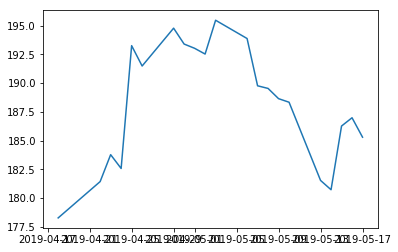

In [17]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# define x and y
x = new_df['date']
y = new_df['close']

# call matplotlib to print x and y
plt.plot(x, y);

*The semicolon at the end is used for aestethic reasons. Just delete it for once and see by yourself what has changed: an ugly line right above the chart will come up...*

We could also call Pandas directly and get a similar result:

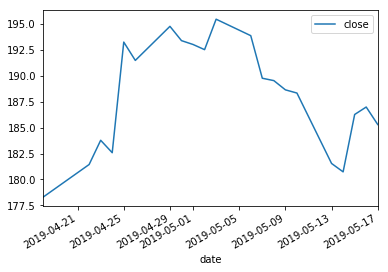

In [11]:
new_df.plot(x='date', y='close');

**Now we want to expand the figure's size, change the line in terms of color, style, and width - and eventually add a legend:**

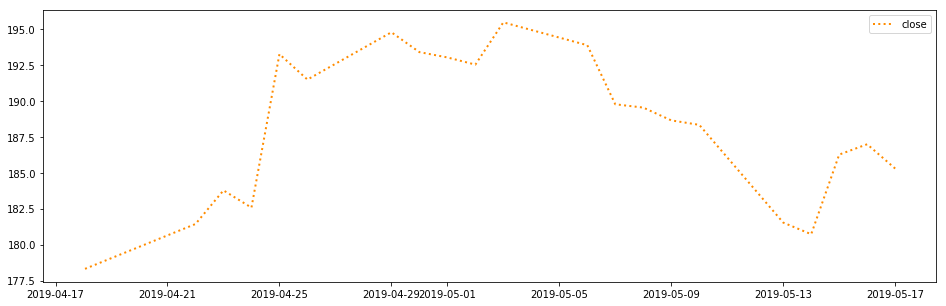

In [12]:
# define figure size
plt.figure(figsize=(16,5))

# plot and define line style
plt.plot(x, y, linestyle=':', linewidth='2', color='darkorange')

# add legend
plt.legend();

**To make the plot easier for readers to understand, labels on both axes are helpful. Also, let's rotate the x labels a bit and add a plot title:**

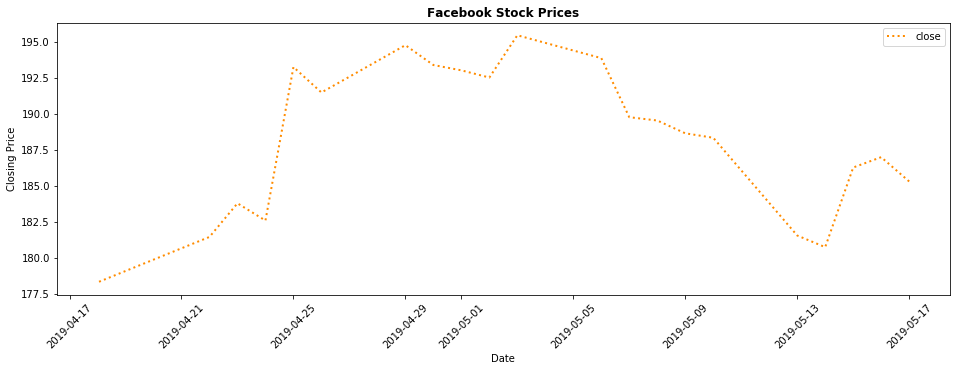

In [13]:
plt.figure(figsize=(16,5))
plt.plot(x, y, linestyle=':', linewidth='2', color='darkorange')

# define x and y label
plt.xlabel('Date')
plt.ylabel('Closing Price')

# rotate x ticks
plt.xticks(rotation=45)

# add plot title and make it bold
plt.title('Facebook Stock Prices', fontweight='bold')

plt.legend();

**By removing the frame around the plot (or the spines), we often get a very attractive plot. And implementing a grid increases readibility:**

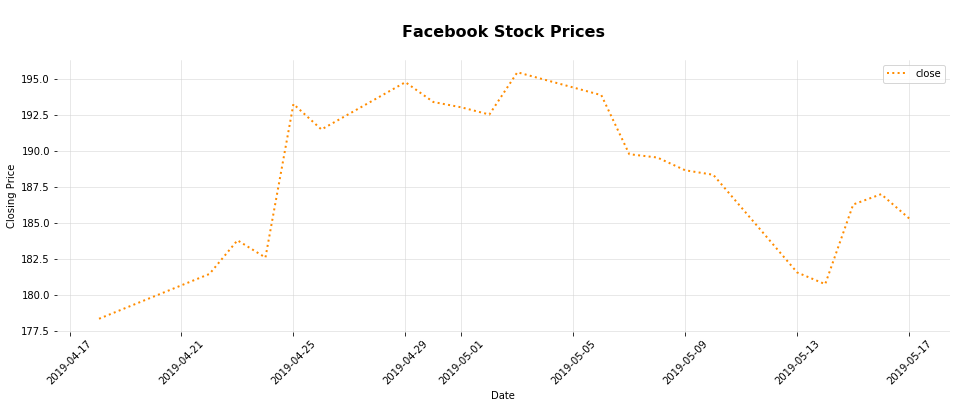

In [14]:
plt.figure(figsize=(16,5))
plt.plot(x, y, linestyle=':', linewidth='2', color='darkorange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)

# the \n adds a line before and after, fontsize increased
plt.title('\nFacebook Stock Prices\n', fontsize=16, fontweight='bold')

# add a grid for better reading
plt.grid(color='lightgrey', linewidth=0.5)

# remove spines for better looking
sns.despine(top=True, right=True, left=True, bottom=True)

plt.legend();

**Finally, we change the legend's name and highlight the x and y labels:**

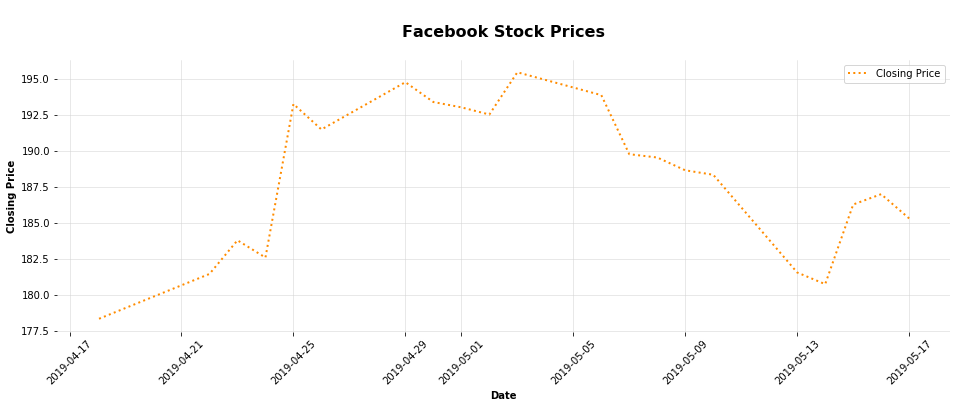

In [15]:
plt.figure(figsize=(16,5))
plt.plot(x, y, linestyle=':', linewidth='2', color='darkorange')

# make x and y label in bold
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')

plt.xticks(rotation=45)
plt.title('\nFacebook Stock Prices\n', fontsize=16, fontweight='bold')
plt.grid(color='lightgrey', linewidth=0.5)
sns.despine(top=True, right=True, left=True, bottom=True)

# change the legend's name
plt.legend(['Closing Price']);

### Bonus

So far, we explicitly used matplotlib. 

Let's try to get a similar plot as the one above by directly calling pandas and especially by creating the **figure and axes objects** during the first step. You will see that we need fewer lines of code:

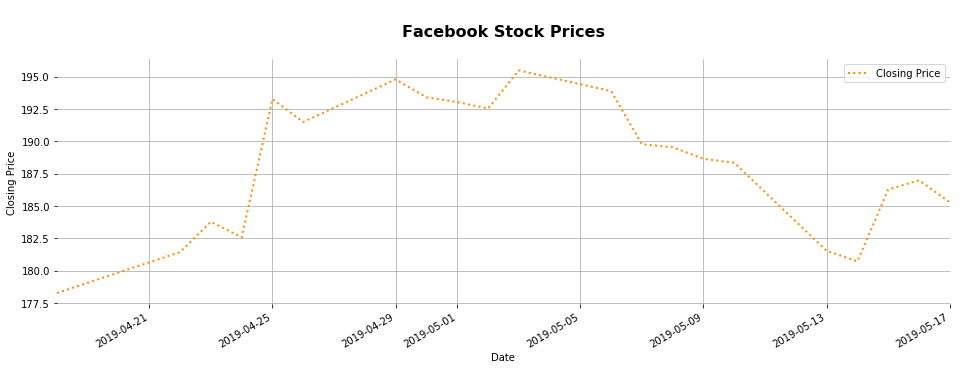

In [16]:
# prepare the plot's figure
fig, ax = plt.subplots(figsize=(16,5))

# define plot, change label wording, and add grid
new_df.plot(x='date', y='close', label='Closing Price', 
            linestyle=':', linewidth='2', color='darkorange', grid=True, ax=ax)

# add title
ax.set_title('\nFacebook Stock Prices\n', fontsize=16, fontweight='bold')

# add x and y label
ax.set(xlabel='Date', ylabel='Closing Price')

sns.despine(top=True, right=True, left=True, bottom=True);

## Resources

All resources used in this tutorial are listed here - and highly recommended for you to follow up:

- [Stock Price Data](https://www.nasdaq.com/symbol/fb/historical)
- [European Data Portal](https://www.europeandataportal.eu/elearning/en/module9/#/id/co-01)
- [Real Python: Reading and Writing CSV Files](https://realpython.com/python-csv/)
- [Real Python: Matplotlib Guide](https://realpython.com/python-matplotlib-guide/)
- [One of my notebooks - dedicated to visualizing data](https://github.com/BrittaInData/Road-Safety-UK/blob/master/1_EDA.ipynb)